In [1]:
import json
import bz2
import os
import csv
import datetime
from bz2 import BZ2File
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pathToData = "data/"
pathToJson = "jsonl_created/" 
pathToBz2 = "ourCorpusBZ2/"
files_to_read = os.listdir(pathToData)
files_to_read

['GDL-1948.jsonl.bz2',
 'GDL-1949.jsonl.bz2',
 'GDL-1950.jsonl.bz2',
 'GDL-1951.jsonl.bz2',
 'GDL-1952.jsonl.bz2',
 'GDL-1953.jsonl.bz2',
 'GDL-1954.jsonl.bz2',
 'GDL-1955.jsonl.bz2',
 'GDL-1956.jsonl.bz2',
 'GDL-1957.jsonl.bz2',
 'GDL-1958.jsonl.bz2',
 'GDL-1959.jsonl.bz2',
 'GDL-1960.jsonl.bz2',
 'GDL-1961.jsonl.bz2',
 'GDL-1962.jsonl.bz2',
 'GDL-1963.jsonl.bz2',
 'GDL-1964.jsonl.bz2',
 'GDL-1965.jsonl.bz2',
 'GDL-1966.jsonl.bz2',
 'GDL-1967.jsonl.bz2',
 'GDL-1968.jsonl.bz2',
 'GDL-1969.jsonl.bz2',
 'GDL-1970.jsonl.bz2',
 'GDL-1971.jsonl.bz2',
 'GDL-1972.jsonl.bz2',
 'GDL-1973.jsonl.bz2',
 'GDL-1974.jsonl.bz2',
 'GDL-1975.jsonl.bz2',
 'GDL-1976.jsonl.bz2',
 'GDL-1977.jsonl.bz2',
 'GDL-1978.jsonl.bz2',
 'GDL-1979.jsonl.bz2',
 'GDL-1980.jsonl.bz2',
 'GDL-1981.jsonl.bz2',
 'GDL-1982.jsonl.bz2',
 'GDL-1983.jsonl.bz2',
 'GDL-1984.jsonl.bz2',
 'GDL-1985.jsonl.bz2',
 'GDL-1986.jsonl.bz2',
 'GDL-1987.jsonl.bz2',
 'GDL-1988.jsonl.bz2',
 'GDL-1989.jsonl.bz2',
 'GDL-1990.jsonl.bz2',
 'GDL-1991.

In [3]:
# a helper function to get the lines from am archive
def read_jsonlines(bz2_file):
    text = bz2_file.read().decode('utf-8')
    for line in text.split('\n'):
        if line != '':
            yield line

In [4]:
def createOurCorpus():
    #From the big corpus to our corpus in json.bz2
    nb =1
    count =0
    returntxt = open("txtname.txt", "w+")
    for file in files_to_read:
        filename = file[0:14]
        with open("jsonl_created/"+filename, 'w') as outfile:  

            print(file)
            print(" " + str(nb) + "/"+ str(len(files_to_read)))
            text_article = ""
            #open the file 
            f = BZ2File(os.path.join(pathToData, file), 'r')
            # get the list of articles it contains (= a json object on each line)
            articles = list(read_jsonlines(f))
            # load the first 100 articles as json and access their attributes
            for a in articles:
                # decode the json string into an object (dict)
                json_article = json.loads(a)
                jsonString = {}

                ### Change here the keyword to search for (can add more than one connected with AND / OR)
                if "apartheid" or "afrique du sud" or "sharpeville" or "ssca" or "anc" or "sarb" or "soweto" or "mandela" or "pretoria" or "johannesburg" or "bloemfontein" or "le cap" in json_article["ft"].lower(): ### expression régulière pour checker ca
                    text_article = text_article + " \n**** *id:" + str(count) + " *from:" + file + "  \n " + json_article["ft"]
                    jsonString = {'id' : str(count), 'd' : json_article["d"], 'ft' : json_article["ft"], 'pp' : json_article["pp"]}
                    json.dump(jsonString, outfile)
                    outfile.write('\n')
                    count += 1
            returntxt.write(text_article)
            nb = nb + 1 
        f = bz2.compress(open(pathToJson + filename, 'rb').read())
        fh = open(pathToBz2 + filename + "A.bz2", 'wb')
        fh.write(f)
        fh.close()
    returntxt.close()

In [5]:
#createOurCorpus()

In [6]:
files_to_read = os.listdir(pathToBz2)
files_to_read

['GDL-1948.jsonlA.bz2',
 'GDL-1949.jsonlA.bz2',
 'GDL-1950.jsonlA.bz2',
 'GDL-1951.jsonlA.bz2',
 'GDL-1952.jsonlA.bz2',
 'GDL-1953.jsonlA.bz2',
 'GDL-1954.jsonlA.bz2',
 'GDL-1955.jsonlA.bz2',
 'GDL-1956.jsonlA.bz2',
 'GDL-1957.jsonlA.bz2',
 'GDL-1958.jsonlA.bz2',
 'GDL-1959.jsonlA.bz2',
 'GDL-1960.jsonlA.bz2',
 'GDL-1961.jsonlA.bz2',
 'GDL-1962.jsonlA.bz2',
 'GDL-1963.jsonlA.bz2',
 'GDL-1964.jsonlA.bz2',
 'GDL-1965.jsonlA.bz2',
 'GDL-1966.jsonlA.bz2',
 'GDL-1967.jsonlA.bz2',
 'GDL-1968.jsonlA.bz2',
 'GDL-1969.jsonlA.bz2',
 'GDL-1970.jsonlA.bz2',
 'GDL-1971.jsonlA.bz2',
 'GDL-1972.jsonlA.bz2',
 'GDL-1973.jsonlA.bz2',
 'GDL-1974.jsonlA.bz2',
 'GDL-1975.jsonlA.bz2',
 'GDL-1976.jsonlA.bz2',
 'GDL-1977.jsonlA.bz2',
 'GDL-1978.jsonlA.bz2',
 'GDL-1979.jsonlA.bz2',
 'GDL-1980.jsonlA.bz2',
 'GDL-1981.jsonlA.bz2',
 'GDL-1982.jsonlA.bz2',
 'GDL-1983.jsonlA.bz2',
 'GDL-1984.jsonlA.bz2',
 'GDL-1985.jsonlA.bz2',
 'GDL-1986.jsonlA.bz2',
 'GDL-1987.jsonlA.bz2',
 'GDL-1988.jsonlA.bz2',
 'GDL-1989.jsonl

In [7]:
files_to_read = os.listdir("ourCorpusBZ2/")
files_to_read

['GDL-1948.jsonlA.bz2',
 'GDL-1949.jsonlA.bz2',
 'GDL-1950.jsonlA.bz2',
 'GDL-1951.jsonlA.bz2',
 'GDL-1952.jsonlA.bz2',
 'GDL-1953.jsonlA.bz2',
 'GDL-1954.jsonlA.bz2',
 'GDL-1955.jsonlA.bz2',
 'GDL-1956.jsonlA.bz2',
 'GDL-1957.jsonlA.bz2',
 'GDL-1958.jsonlA.bz2',
 'GDL-1959.jsonlA.bz2',
 'GDL-1960.jsonlA.bz2',
 'GDL-1961.jsonlA.bz2',
 'GDL-1962.jsonlA.bz2',
 'GDL-1963.jsonlA.bz2',
 'GDL-1964.jsonlA.bz2',
 'GDL-1965.jsonlA.bz2',
 'GDL-1966.jsonlA.bz2',
 'GDL-1967.jsonlA.bz2',
 'GDL-1968.jsonlA.bz2',
 'GDL-1969.jsonlA.bz2',
 'GDL-1970.jsonlA.bz2',
 'GDL-1971.jsonlA.bz2',
 'GDL-1972.jsonlA.bz2',
 'GDL-1973.jsonlA.bz2',
 'GDL-1974.jsonlA.bz2',
 'GDL-1975.jsonlA.bz2',
 'GDL-1976.jsonlA.bz2',
 'GDL-1977.jsonlA.bz2',
 'GDL-1978.jsonlA.bz2',
 'GDL-1979.jsonlA.bz2',
 'GDL-1980.jsonlA.bz2',
 'GDL-1981.jsonlA.bz2',
 'GDL-1982.jsonlA.bz2',
 'GDL-1983.jsonlA.bz2',
 'GDL-1984.jsonlA.bz2',
 'GDL-1985.jsonlA.bz2',
 'GDL-1986.jsonlA.bz2',
 'GDL-1987.jsonlA.bz2',
 'GDL-1988.jsonlA.bz2',
 'GDL-1989.jsonl

In [8]:
### y: year, m: month, d: day, deltap: the delta from dateEvent to max in days, deltan: the delta to dateEvent from min in days
### dateEventstring: date of the event we want to look at.
def csvtxtwriter(csvname, y, m, d, deltap, deltan):
    nb =0
    count =0
    dateMax = datetime.timedelta(days = deltap)
    dateMin = datetime.timedelta(days = deltan)
    dateEventstring = str(y)+"-"+str(m) + "-"+str(d)
    dateEvent = datetime.datetime.strptime(dateEventstring, '%Y-%m-%d')
    pathCSV = "csv/"
    text_articletxt = ""
    with open(pathCSV + csvname, 'w', newline='') as csvFinal:
        linewriter = csv.writer(csvFinal, delimiter = '*')
        linewriter.writerow(["id", "date"])
        print(files_to_read)
        for file in files_to_read:
            nb +=1
            print(file)
            print(" " + str(nb) + "/"+ str(len(files_to_read)))
            #open the file 
            f = BZ2File(os.path.join("ourCorpusBZ2/", file), 'r')
            # get the list of articles it contains (= a json object on each line)
            articles = list(read_jsonlines(f))
            # load the first 100 articles as json and access their attributes

            for a in articles:
                # decode the json string into an object (dict)
                json_article = json.loads(a)
                datearticle = datetime.datetime.strptime(json_article["d"], '%Y-%m-%d')
                if ((datearticle - dateEvent < dateMax) and (datearticle - dateEvent > dateMin)) :
                    linewriter.writerow([str(count), json_article["d"][:7]]) ###if we want groupbyday: remove [:7]
                    count += 1

In [9]:
csvtxtwriter("text1.csv", 1949, 6, 29, 365, -700)

['GDL-1948.jsonlA.bz2', 'GDL-1949.jsonlA.bz2', 'GDL-1950.jsonlA.bz2', 'GDL-1951.jsonlA.bz2', 'GDL-1952.jsonlA.bz2', 'GDL-1953.jsonlA.bz2', 'GDL-1954.jsonlA.bz2', 'GDL-1955.jsonlA.bz2', 'GDL-1956.jsonlA.bz2', 'GDL-1957.jsonlA.bz2', 'GDL-1958.jsonlA.bz2', 'GDL-1959.jsonlA.bz2', 'GDL-1960.jsonlA.bz2', 'GDL-1961.jsonlA.bz2', 'GDL-1962.jsonlA.bz2', 'GDL-1963.jsonlA.bz2', 'GDL-1964.jsonlA.bz2', 'GDL-1965.jsonlA.bz2', 'GDL-1966.jsonlA.bz2', 'GDL-1967.jsonlA.bz2', 'GDL-1968.jsonlA.bz2', 'GDL-1969.jsonlA.bz2', 'GDL-1970.jsonlA.bz2', 'GDL-1971.jsonlA.bz2', 'GDL-1972.jsonlA.bz2', 'GDL-1973.jsonlA.bz2', 'GDL-1974.jsonlA.bz2', 'GDL-1975.jsonlA.bz2', 'GDL-1976.jsonlA.bz2', 'GDL-1977.jsonlA.bz2', 'GDL-1978.jsonlA.bz2', 'GDL-1979.jsonlA.bz2', 'GDL-1980.jsonlA.bz2', 'GDL-1981.jsonlA.bz2', 'GDL-1982.jsonlA.bz2', 'GDL-1983.jsonlA.bz2', 'GDL-1984.jsonlA.bz2', 'GDL-1985.jsonlA.bz2', 'GDL-1986.jsonlA.bz2', 'GDL-1987.jsonlA.bz2', 'GDL-1988.jsonlA.bz2', 'GDL-1989.jsonlA.bz2', 'GDL-1990.jsonlA.bz2', 'GDL-1991.

In [10]:
datey = [1948, 1960, 1976, 1983, 1986, 1990, 1990, 1962, 1949]
datem = [6, 3, 6, 5, 6, 3, 2, 8, 6]
dated = [15, 21, 16, 20, 12, 15, 11, 15, 29]
title = ["début de l'Apartheid", "Massacre de Sharpeville", "Émeutes de Soweto", "Attentat de Church Street", "état d'urgence", "légalisation des partis politiques", "libération de Mandela", "Condamnation de Mandela", "test1"]

In [11]:
for d in range(0, len(datey)-1):
    print("FOR TOTAL: " + str(d) + "/" + str(len(datey)))
    name = str(datey[d]) +"_" + str(datem[d]) + ".csv"
    csvtxtwriter(name, datey[d], datem[d], dated[d], 366, -366)

FOR TOTAL: 0/9
['GDL-1948.jsonlA.bz2', 'GDL-1949.jsonlA.bz2', 'GDL-1950.jsonlA.bz2', 'GDL-1951.jsonlA.bz2', 'GDL-1952.jsonlA.bz2', 'GDL-1953.jsonlA.bz2', 'GDL-1954.jsonlA.bz2', 'GDL-1955.jsonlA.bz2', 'GDL-1956.jsonlA.bz2', 'GDL-1957.jsonlA.bz2', 'GDL-1958.jsonlA.bz2', 'GDL-1959.jsonlA.bz2', 'GDL-1960.jsonlA.bz2', 'GDL-1961.jsonlA.bz2', 'GDL-1962.jsonlA.bz2', 'GDL-1963.jsonlA.bz2', 'GDL-1964.jsonlA.bz2', 'GDL-1965.jsonlA.bz2', 'GDL-1966.jsonlA.bz2', 'GDL-1967.jsonlA.bz2', 'GDL-1968.jsonlA.bz2', 'GDL-1969.jsonlA.bz2', 'GDL-1970.jsonlA.bz2', 'GDL-1971.jsonlA.bz2', 'GDL-1972.jsonlA.bz2', 'GDL-1973.jsonlA.bz2', 'GDL-1974.jsonlA.bz2', 'GDL-1975.jsonlA.bz2', 'GDL-1976.jsonlA.bz2', 'GDL-1977.jsonlA.bz2', 'GDL-1978.jsonlA.bz2', 'GDL-1979.jsonlA.bz2', 'GDL-1980.jsonlA.bz2', 'GDL-1981.jsonlA.bz2', 'GDL-1982.jsonlA.bz2', 'GDL-1983.jsonlA.bz2', 'GDL-1984.jsonlA.bz2', 'GDL-1985.jsonlA.bz2', 'GDL-1986.jsonlA.bz2', 'GDL-1987.jsonlA.bz2', 'GDL-1988.jsonlA.bz2', 'GDL-1989.jsonlA.bz2', 'GDL-1990.jsonlA.b

JDG-1969.jsonlA.bz2
 66/88
JDG-1970.jsonlA.bz2
 67/88
JDG-1971.jsonlA.bz2
 68/88
JDG-1972.jsonlA.bz2
 69/88
JDG-1973.jsonlA.bz2
 70/88
JDG-1974.jsonlA.bz2
 71/88
JDG-1975.jsonlA.bz2
 72/88
JDG-1976.jsonlA.bz2
 73/88
JDG-1977.jsonlA.bz2
 74/88
JDG-1978.jsonlA.bz2
 75/88
JDG-1979.jsonlA.bz2
 76/88
JDG-1980.jsonlA.bz2
 77/88
JDG-1981.jsonlA.bz2
 78/88
JDG-1982.jsonlA.bz2
 79/88
JDG-1983.jsonlA.bz2
 80/88
JDG-1984.jsonlA.bz2
 81/88
JDG-1985.jsonlA.bz2
 82/88
JDG-1986.jsonlA.bz2
 83/88
JDG-1987.jsonlA.bz2
 84/88
JDG-1988.jsonlA.bz2
 85/88
JDG-1989.jsonlA.bz2
 86/88
JDG-1990.jsonlA.bz2
 87/88
JDG-1991.jsonlA.bz2
 88/88
FOR TOTAL: 2/9
['GDL-1948.jsonlA.bz2', 'GDL-1949.jsonlA.bz2', 'GDL-1950.jsonlA.bz2', 'GDL-1951.jsonlA.bz2', 'GDL-1952.jsonlA.bz2', 'GDL-1953.jsonlA.bz2', 'GDL-1954.jsonlA.bz2', 'GDL-1955.jsonlA.bz2', 'GDL-1956.jsonlA.bz2', 'GDL-1957.jsonlA.bz2', 'GDL-1958.jsonlA.bz2', 'GDL-1959.jsonlA.bz2', 'GDL-1960.jsonlA.bz2', 'GDL-1961.jsonlA.bz2', 'GDL-1962.jsonlA.bz2', 'GDL-1963.jsonlA.b

GDL-1990.jsonlA.bz2
 43/88
GDL-1991.jsonlA.bz2
 44/88
JDG-1948.jsonlA.bz2
 45/88
JDG-1949.jsonlA.bz2
 46/88
JDG-1950.jsonlA.bz2
 47/88
JDG-1951.jsonlA.bz2
 48/88
JDG-1952.jsonlA.bz2
 49/88
JDG-1953.jsonlA.bz2
 50/88
JDG-1954.jsonlA.bz2
 51/88
JDG-1955.jsonlA.bz2
 52/88
JDG-1956.jsonlA.bz2
 53/88
JDG-1957.jsonlA.bz2
 54/88
JDG-1958.jsonlA.bz2
 55/88
JDG-1959.jsonlA.bz2
 56/88
JDG-1960.jsonlA.bz2
 57/88
JDG-1961.jsonlA.bz2
 58/88
JDG-1962.jsonlA.bz2
 59/88
JDG-1963.jsonlA.bz2
 60/88
JDG-1964.jsonlA.bz2
 61/88
JDG-1965.jsonlA.bz2
 62/88
JDG-1966.jsonlA.bz2
 63/88
JDG-1967.jsonlA.bz2
 64/88
JDG-1968.jsonlA.bz2
 65/88
JDG-1969.jsonlA.bz2
 66/88
JDG-1970.jsonlA.bz2
 67/88
JDG-1971.jsonlA.bz2
 68/88
JDG-1972.jsonlA.bz2
 69/88
JDG-1973.jsonlA.bz2
 70/88
JDG-1974.jsonlA.bz2
 71/88
JDG-1975.jsonlA.bz2
 72/88
JDG-1976.jsonlA.bz2
 73/88
JDG-1977.jsonlA.bz2
 74/88
JDG-1978.jsonlA.bz2
 75/88
JDG-1979.jsonlA.bz2
 76/88
JDG-1980.jsonlA.bz2
 77/88
JDG-1981.jsonlA.bz2
 78/88
JDG-1982.jsonlA.bz2
 79/88
J

GDL-1967.jsonlA.bz2
 20/88
GDL-1968.jsonlA.bz2
 21/88
GDL-1969.jsonlA.bz2
 22/88
GDL-1970.jsonlA.bz2
 23/88
GDL-1971.jsonlA.bz2
 24/88
GDL-1972.jsonlA.bz2
 25/88
GDL-1973.jsonlA.bz2
 26/88
GDL-1974.jsonlA.bz2
 27/88
GDL-1975.jsonlA.bz2
 28/88
GDL-1976.jsonlA.bz2
 29/88
GDL-1977.jsonlA.bz2
 30/88
GDL-1978.jsonlA.bz2
 31/88
GDL-1979.jsonlA.bz2
 32/88
GDL-1980.jsonlA.bz2
 33/88
GDL-1981.jsonlA.bz2
 34/88
GDL-1982.jsonlA.bz2
 35/88
GDL-1983.jsonlA.bz2
 36/88
GDL-1984.jsonlA.bz2
 37/88
GDL-1985.jsonlA.bz2
 38/88
GDL-1986.jsonlA.bz2
 39/88
GDL-1987.jsonlA.bz2
 40/88
GDL-1988.jsonlA.bz2
 41/88
GDL-1989.jsonlA.bz2
 42/88
GDL-1990.jsonlA.bz2
 43/88
GDL-1991.jsonlA.bz2
 44/88
JDG-1948.jsonlA.bz2
 45/88
JDG-1949.jsonlA.bz2
 46/88
JDG-1950.jsonlA.bz2
 47/88
JDG-1951.jsonlA.bz2
 48/88
JDG-1952.jsonlA.bz2
 49/88
JDG-1953.jsonlA.bz2
 50/88
JDG-1954.jsonlA.bz2
 51/88
JDG-1955.jsonlA.bz2
 52/88
JDG-1956.jsonlA.bz2
 53/88
JDG-1957.jsonlA.bz2
 54/88
JDG-1958.jsonlA.bz2
 55/88
JDG-1959.jsonlA.bz2
 56/88
J

GDL-1949.jsonlA.bz2
 2/88
GDL-1950.jsonlA.bz2
 3/88
GDL-1951.jsonlA.bz2
 4/88
GDL-1952.jsonlA.bz2
 5/88
GDL-1953.jsonlA.bz2
 6/88
GDL-1954.jsonlA.bz2
 7/88
GDL-1955.jsonlA.bz2
 8/88
GDL-1956.jsonlA.bz2
 9/88
GDL-1957.jsonlA.bz2
 10/88
GDL-1958.jsonlA.bz2
 11/88
GDL-1959.jsonlA.bz2
 12/88
GDL-1960.jsonlA.bz2
 13/88
GDL-1961.jsonlA.bz2
 14/88
GDL-1962.jsonlA.bz2
 15/88
GDL-1963.jsonlA.bz2
 16/88
GDL-1964.jsonlA.bz2
 17/88
GDL-1965.jsonlA.bz2
 18/88
GDL-1966.jsonlA.bz2
 19/88
GDL-1967.jsonlA.bz2
 20/88
GDL-1968.jsonlA.bz2
 21/88
GDL-1969.jsonlA.bz2
 22/88
GDL-1970.jsonlA.bz2
 23/88
GDL-1971.jsonlA.bz2
 24/88
GDL-1972.jsonlA.bz2
 25/88
GDL-1973.jsonlA.bz2
 26/88
GDL-1974.jsonlA.bz2
 27/88
GDL-1975.jsonlA.bz2
 28/88
GDL-1976.jsonlA.bz2
 29/88
GDL-1977.jsonlA.bz2
 30/88
GDL-1978.jsonlA.bz2
 31/88
GDL-1979.jsonlA.bz2
 32/88
GDL-1980.jsonlA.bz2
 33/88
GDL-1981.jsonlA.bz2
 34/88
GDL-1982.jsonlA.bz2
 35/88
GDL-1983.jsonlA.bz2
 36/88
GDL-1984.jsonlA.bz2
 37/88
GDL-1985.jsonlA.bz2
 38/88
GDL-1986.

In [12]:
def fromCSVtoGraph(csvname, title):
    a = pd.read_csv(csvname, delimiter='*')
    futurG = a.groupby(['date']).count().sort_values(by='date')
    ax = futurG.plot(kind='bar', title = title)
    middle = len(ax.get_xticklabels()[:]) / 2
    ax.get_xticklabels()[int(middle)].set_color("red")
    ax.legend(["Occurences"]);
    plt.savefig("fig/"+title+".pdf")
    return ax

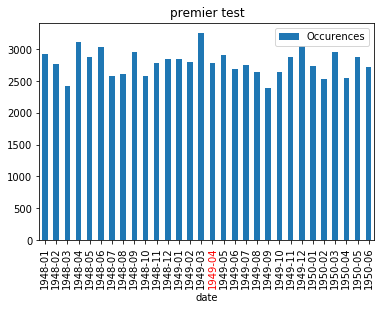

In [13]:
fromCSVtoGraph('csv/text1.csv', "premier test")

In [14]:
csv_to_read = os.listdir("csv/")
csv_to_read

['1948_6.csv',
 '1960_3.csv',
 '1962_8.csv',
 '1976_6.csv',
 '1983_5.csv',
 '1986_6.csv',
 '1990_2.csv',
 '1990_3.csv',
 'text1.csv']

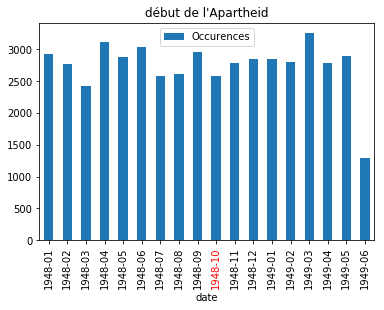

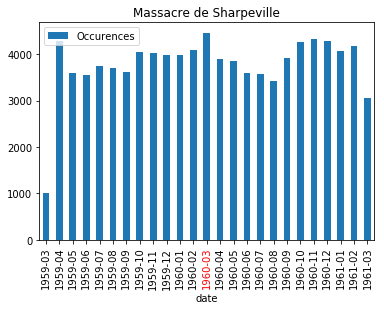

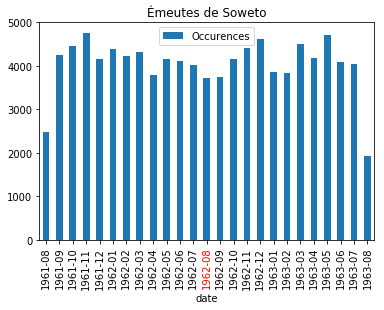

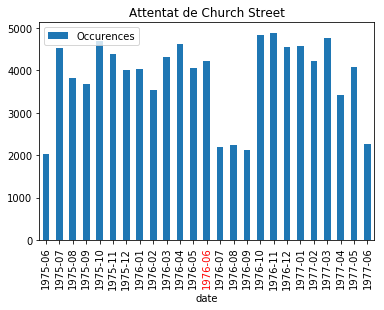

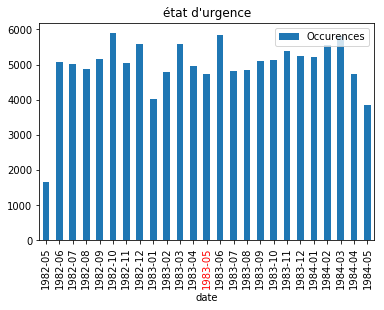

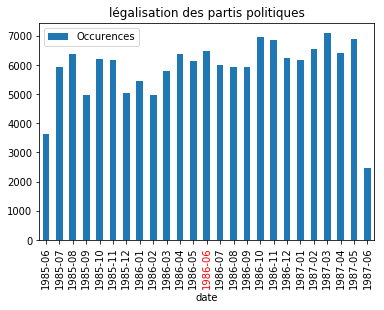

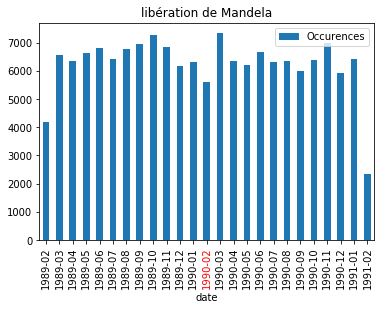

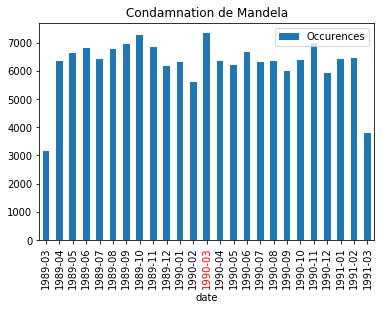

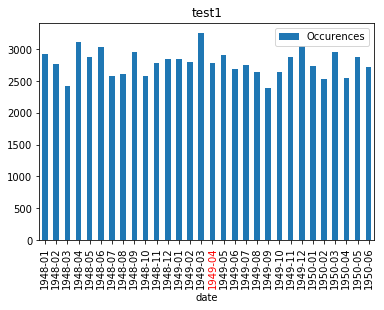

In [15]:
indexi = 0
for csv in csv_to_read:
    fromCSVtoGraph("csv/" + csv, title[indexi])
    indexi = indexi + 1